<a href="https://colab.research.google.com/github/emilyperras/ECON5200-Applied-Data-Analytics-in-Economics/blob/main/Lab%203/%5BLab_3%5D_Visualizing_Development_with_WBGAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## El Salvador World Development Indicator Analysis

#Step 1: Setup & Indicators

In [ ]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define Economies: SLV (El Salvador), UMC (Upper Middle Income), WLD (World)
country_codes = ['SLV', 'UMC', 'WLD']

'''
Upper middle income group aggregate. Upper-middle-income economies are those in
which 2024 Atlas GNI per capita was between $4,496 and $13,935.
'''

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}


#Step 2: Ingest & Clean

In [ ]:

# 1. Fetch Data. -- Put the data into DataFrame
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2010, 2025))

# 2. Transpose
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract El Salvador for specific calculations
df_slv = df.xs('SLV', axis=1, level=0).copy()




Fetching data...


In [ ]:
df

economy           SLV                                                          \
series  Inflation_CPI Tax_Rev_GDP Gov_Exp_GDP Exports_GDP Gross_Cap_Formation   
Year                                                                            
2010         1.179336   15.812081   15.711582   26.946669           16.671581   
2011         5.128924   15.344034   15.755890   28.981778           17.789929   
2012         1.729735   16.182436   15.757441   28.571061           17.709546   
2013         0.757669   17.054735   16.305882   29.724896           17.019403   
2014         1.141345   16.708795   15.954167   29.552875           16.397216   
2015        -0.731384   16.752685   16.497442   29.486173           16.016988   
2016         0.604049   17.354776   16.316439   28.458591           15.967514   
2017         1.012354   17.753751   16.133109   29.029764           16.677002   
2018         1.090330   18.128924   16.109658   28.934374           18.371537   
2019         0.075324   18.081450   16.032021   29.955910           18.344795   
2020        -0.371590   18.390775   19.696852   24.526798           17.211618   
2021         3.466926   19.689675   19.346772   28.781495           23.354913   
2022         7.198616   21.162456   18.810943   32.433483           24.471574   
2023         4.045547   20.705238   19.063660   31.397143           20.684682   
2024         0.853782   21.496985   19.171915   32.760704           20.344233   

economy                                                                   \
series  Imports_GDP     GDP_Const GDP_Per_Capita_Const Gross_Dom_Savings   
Year                                                                       
2010      46.590618  2.062290e+10          3398.493461         -2.972313   
2011      50.294866  2.140113e+10          3514.069144         -3.523160   
2012      49.077510  2.201913e+10          3601.442229         -2.796950   
2013      50.726298  2.249979e+10          3665.154733         -3.982045   
2014      48.551551  2.288891e+10          3713.949920         -2.601460   
2015      47.074098  2.343824e+10          3790.340891         -1.570980   
2016      44.360503  2.403335e+10          3875.846914          0.065602   
2017      45.274887  2.457353e+10          3954.840143          0.431879   
2018      46.699243  2.516635e+10          4046.162917          0.606629   
2019      46.086103  2.577978e+10          4143.114371          2.214638   
2020      41.932709  2.374495e+10          3808.531954         -0.194333   
2021      53.063581  2.657173e+10          4247.547504         -0.927207   
2022      56.267626  2.735682e+10          4355.960839          0.637462   
2023      50.317629  2.832502e+10          4489.177877          1.764196   
2024      51.898942  2.906205e+10          4585.225998          1.205939   

economy                  ...         WLD                                  \
series  Labor_Part_Rate  ... Gov_Exp_GDP Exports_GDP Gross_Cap_Formation   
Year                     ...                                               
2010             59.889  ...   17.506035   28.466943           24.562498   
2011             59.579  ...   17.319428   30.253783           25.260571   
2012             60.197  ...   17.128892   30.048120           25.411483   
2013             60.524  ...   17.063937   30.063004           25.549540   
2014             59.397  ...   16.911155   29.795109           25.819758   
2015             58.688  ...   16.744050   28.127950           25.874467   
2016             59.261  ...   16.735067   27.173345           25.607897   
2017             59.006  ...   16.562782   28.098578           26.073261   
2018             58.729  ...   16.584990   28.964555           26.602670   
2019             59.887  ...   16.710995   28.028641           26.516318   
2020             56.752  ...   17.901298   26.142438           26.435301   
2021             59.173  ...   17.087277   28.648469           27.233907   
2022             60.080  ...   1

#Step 3: Calculations


In [ ]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_slv['Natural_Rate_Unemp'] = df_slv['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (GDP / Worker) output/LF
df_slv['Productivity'] = df_slv['GDP_Const'] / df_slv['Labor_Force_Total']

# 3. NX (Exports - Imports)
df_slv['NCO'] = df_slv['Exports_GDP'] - df_slv['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_slv['Budget_Balance'] = df_slv['Tax_Rev_GDP'] - df_slv['Gov_Exp_GDP']

# Exercise 1: The "Narrow View" (Illusion of Success)

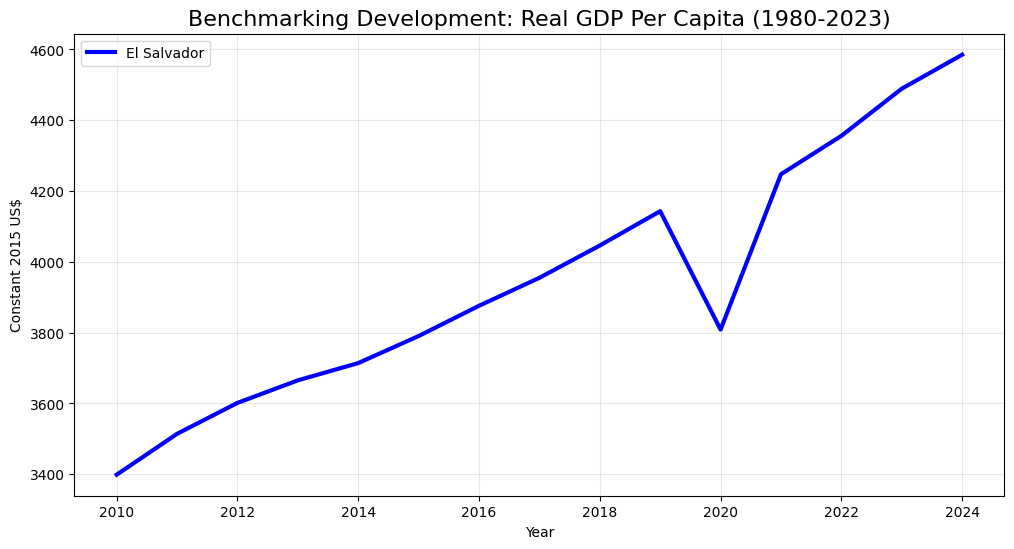

In [ ]:
plt.figure(figsize=(12, 6))
# Plot ONLY El Salvador
plt.plot(df.index, df[('SLV', 'GDP_Per_Capita_Const')], label='El Salvador', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (1980-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#Exercise 2: The "Full Picture" (Benchmarking)

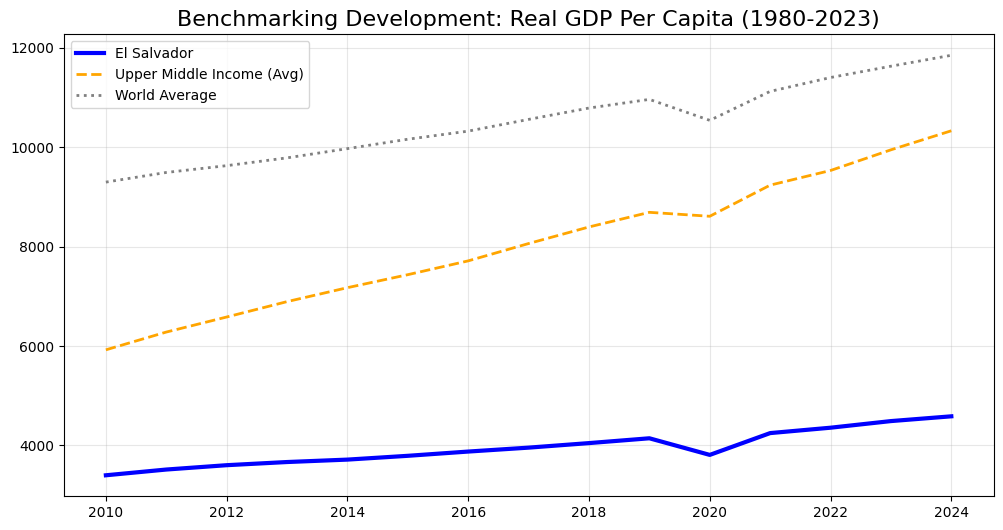

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('SLV', 'GDP_Per_Capita_Const')], label='El Salvador', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (1980-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#Exercise 3: Wealth & Growth (Subplots)


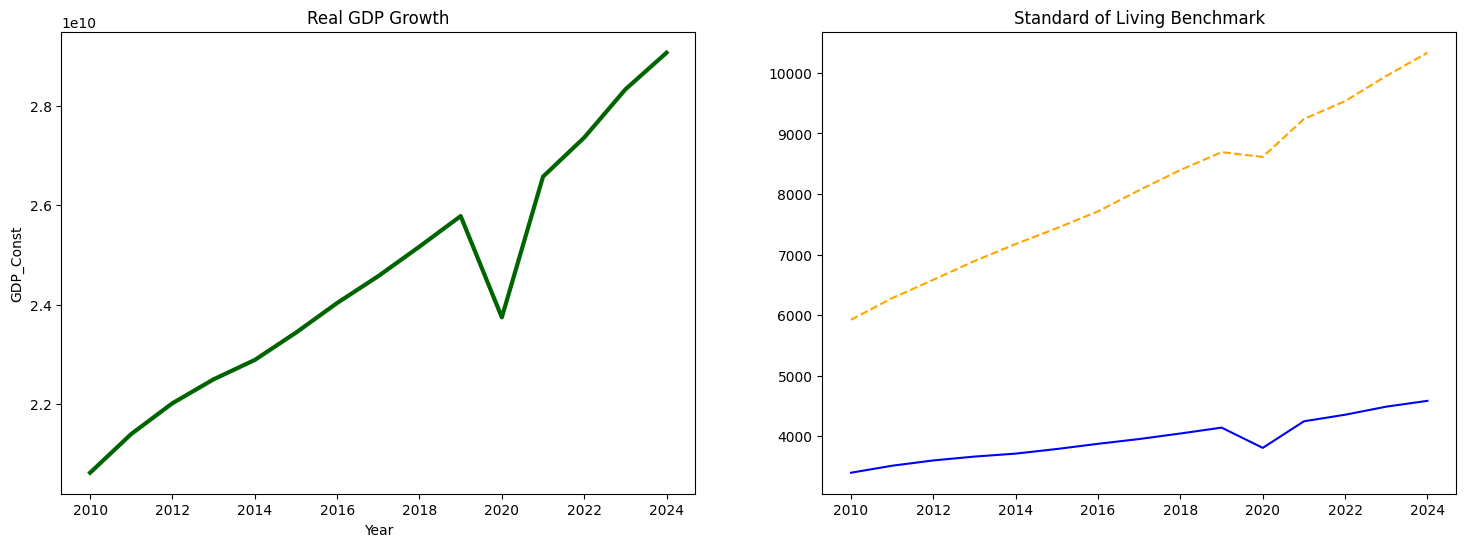

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_slv, x=df_slv.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('SLV', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

# Exercise 4: Labor Market (Vertical Comparison)


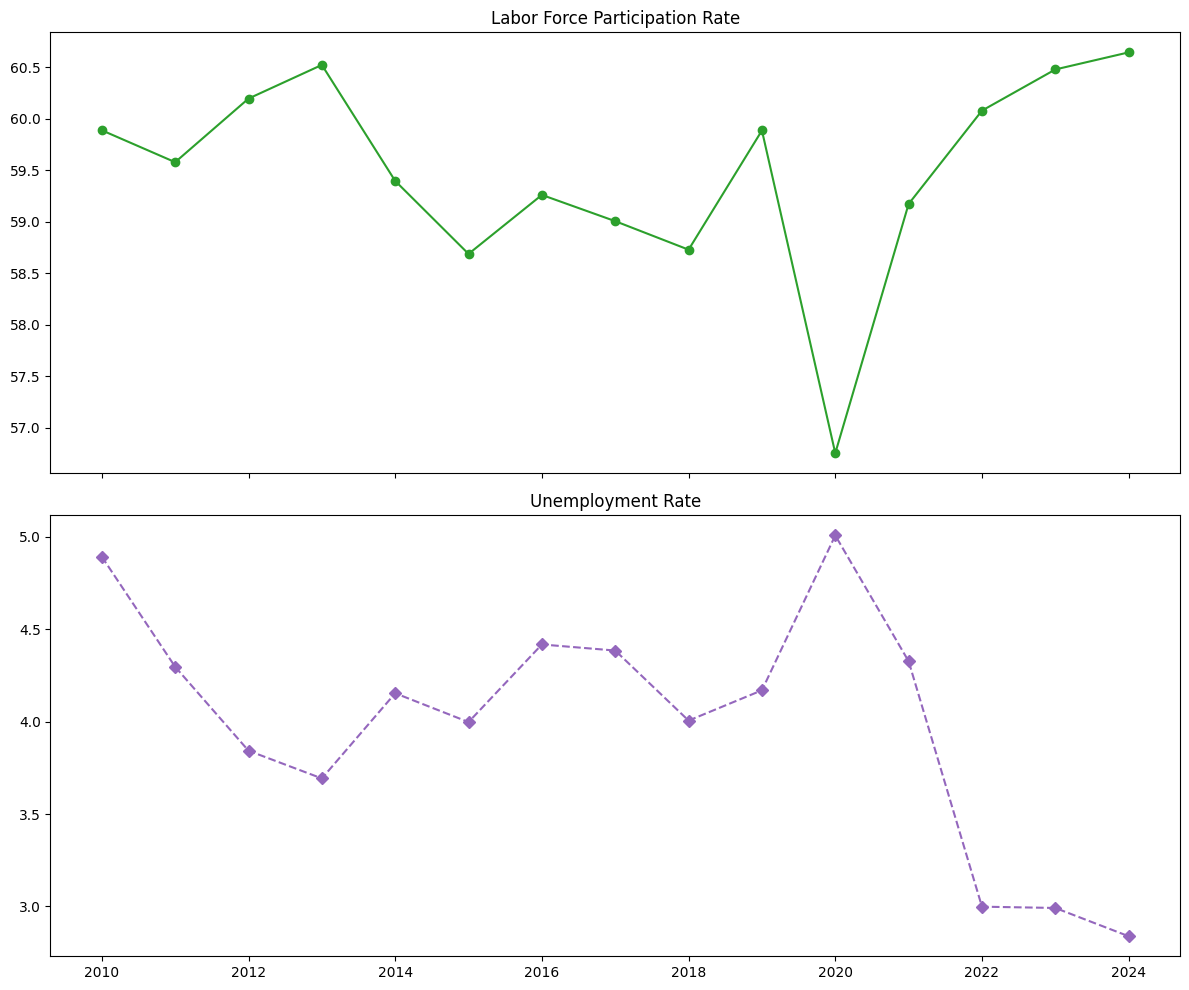

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_slv.index, df_slv['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_slv.index, df_slv['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

#Exercise 5: Inflation


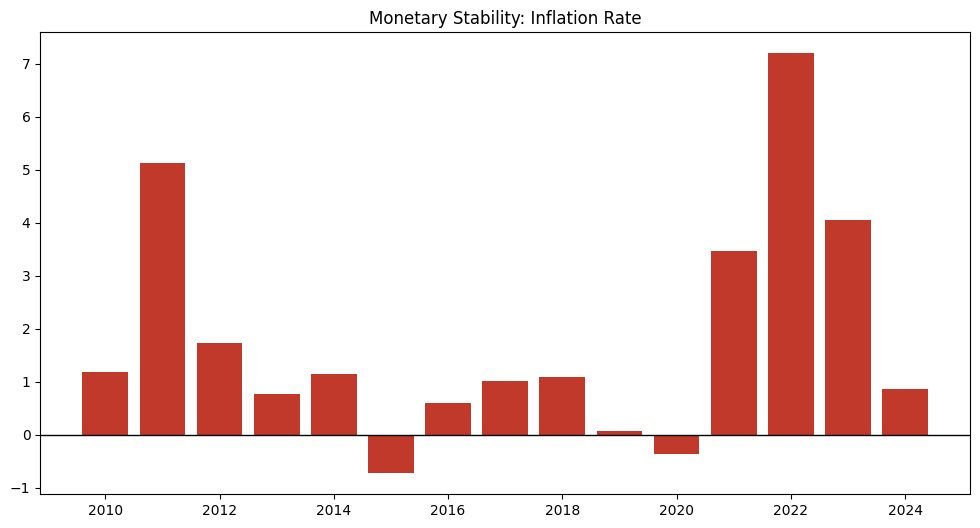

In [ ]:
plt.figure(figsize=(12, 6))

plt.bar(df_slv.index, df_slv['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

#Exercise 6: Savings & Investment


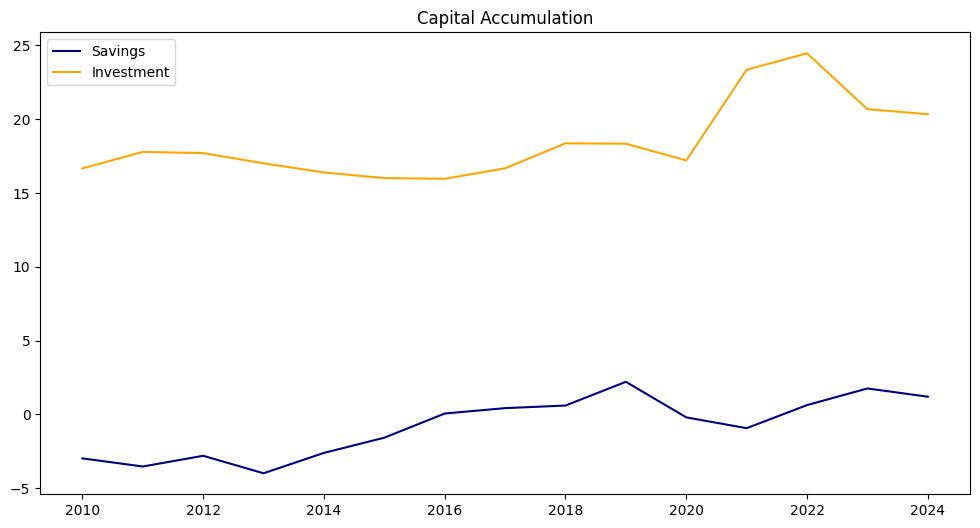

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_slv.index, df_slv['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_slv.index, df_slv['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()


#Exercise 7: Trade Balance & NCO


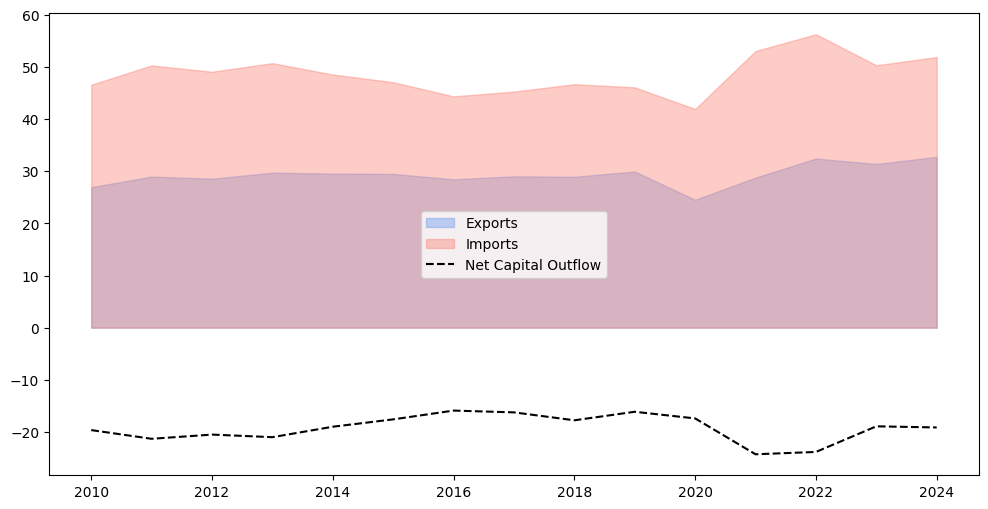

In [ ]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_slv.index, df_slv['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_slv.index, df_slv['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_slv.index, df_slv['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()


#Exercise 8: Fiscal Policy


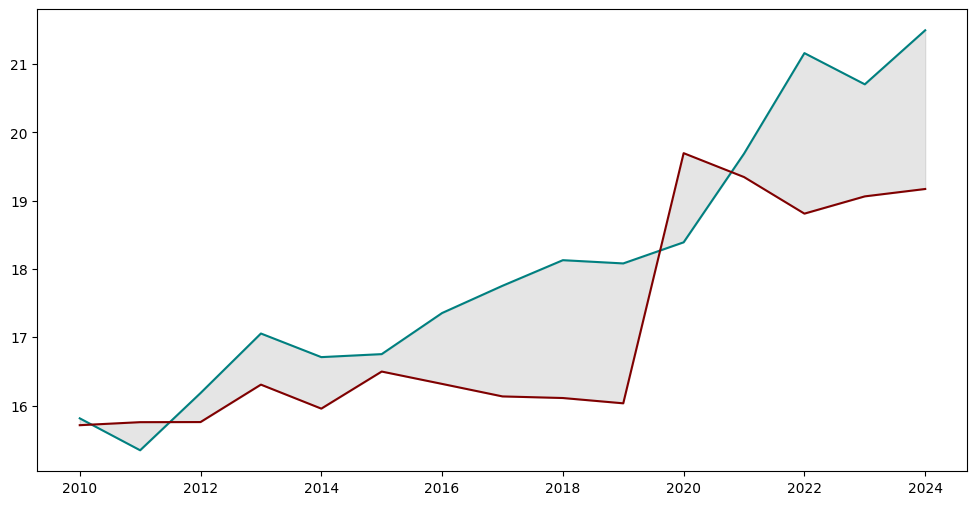

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_slv.index, df_slv['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_slv.index, df_slv['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_slv.index, df_slv['Tax_Rev_GDP'], df_slv['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()


# AI Prompted Executive Dashboard

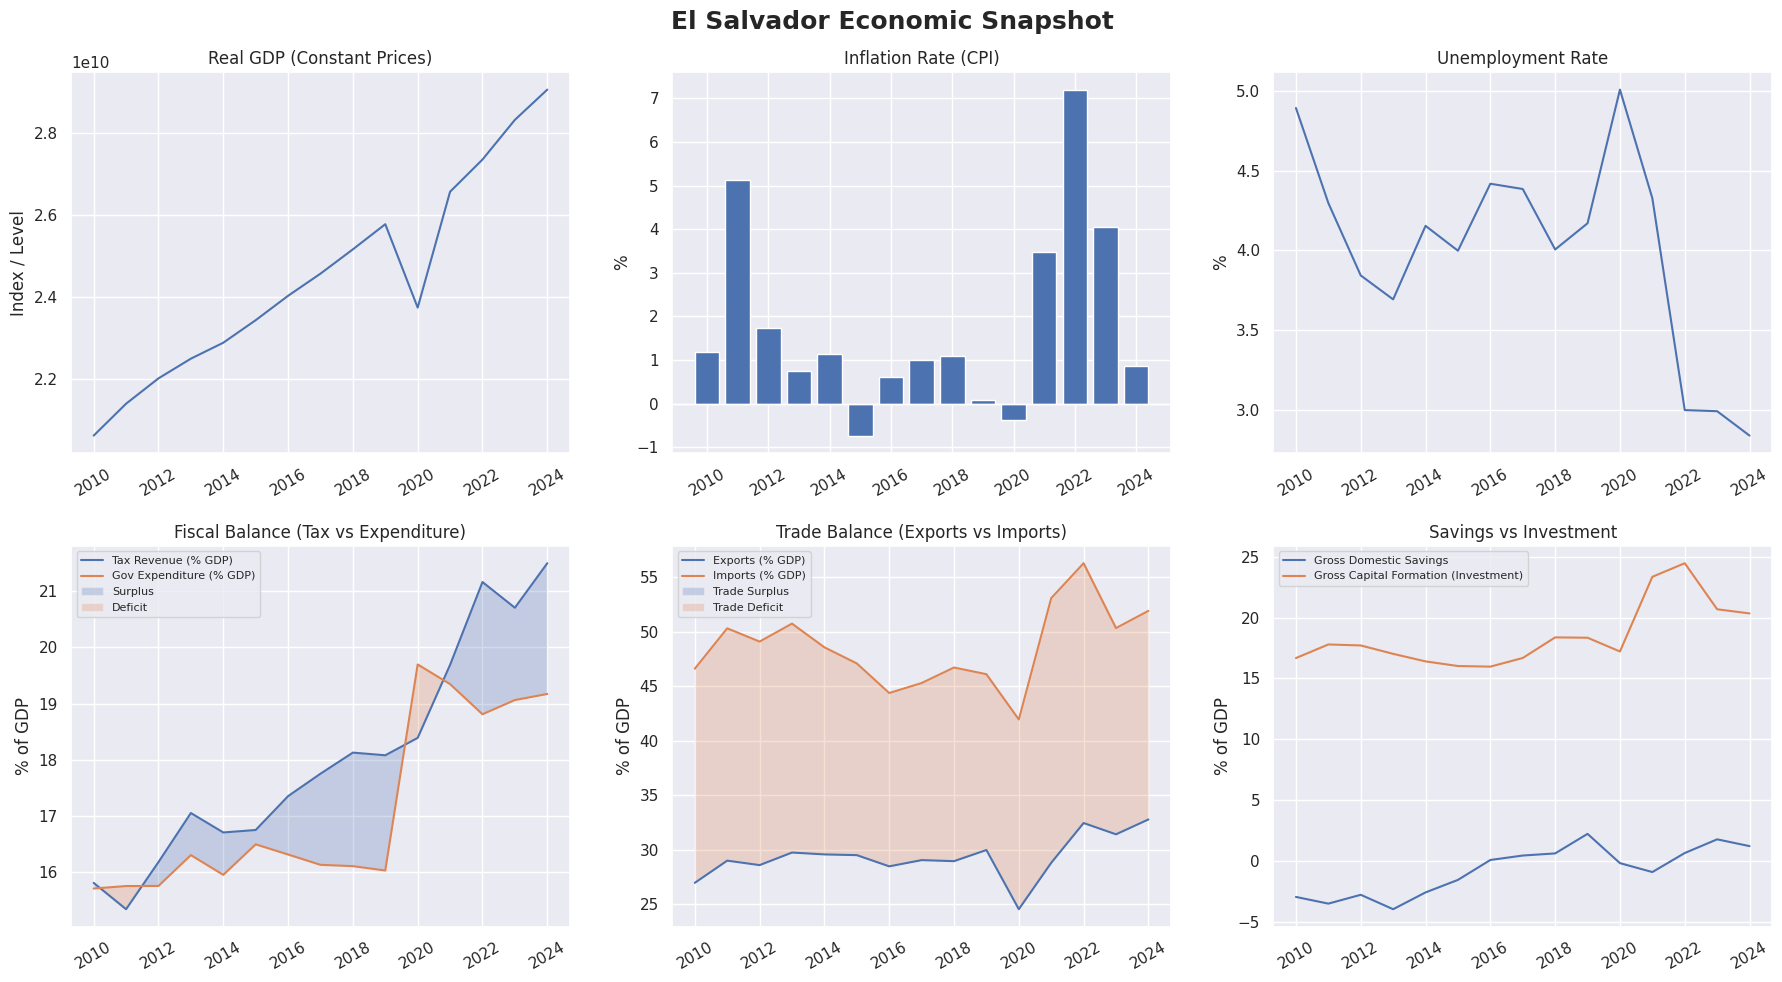

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Assumptions ---
# df_slv is your DataFrame
# It is indexed by date already (DatetimeIndex). If not, set it before plotting:
# df_slv['Date'] = pd.to_datetime(df_slv['Date'])
# df_slv = df_slv.set_index('Date').sort_index()

plt.style.use("dark_background")
sns.set_theme()  # keeps defaults (no manual colors)

# Make sure data is sorted by time
df = df_slv.sort_index()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("El Salvador Economic Snapshot", fontsize=18, fontweight="bold", y=0.98)

# -------------------------
# 1) Top Left: Real GDP
# -------------------------
ax = axes[0, 0]
ax.plot(df.index, df["GDP_Const"])
ax.set_title("Real GDP (Constant Prices)")
ax.set_ylabel("Index / Level")

# -----------------------------------
# 2) Top Middle: Inflation (bar + 0)
# -----------------------------------
ax = axes[0, 1]
ax.bar(df.index, df["Inflation_CPI"])
ax.axhline(0, linewidth=1)
ax.set_title("Inflation Rate (CPI)")
ax.set_ylabel("%")

# ------------------------------
# 3) Top Right: Unemployment
# ------------------------------
ax = axes[0, 2]
ax.plot(df.index, df["Unemployment_Rate"])
ax.set_title("Unemployment Rate")
ax.set_ylabel("%")

# ---------------------------------------------------------
# 4) Bottom Left: Fiscal Balance (Tax vs Gov Expenditure)
# ---------------------------------------------------------
ax = axes[1, 0]
tax = df["Tax_Rev_GDP"]
gov = df["Gov_Exp_GDP"]

ax.plot(df.index, tax, label="Tax Revenue (% GDP)")
ax.plot(df.index, gov, label="Gov Expenditure (% GDP)")

# Fill surplus/deficit areas
ax.fill_between(df.index, tax, gov, where=(tax >= gov), interpolate=True, alpha=0.25, label="Surplus")
ax.fill_between(df.index, tax, gov, where=(tax < gov), interpolate=True, alpha=0.25, label="Deficit")

ax.set_title("Fiscal Balance (Tax vs Expenditure)")
ax.set_ylabel("% of GDP")
ax.legend(fontsize=8, loc="best")

# ------------------------------------------------
# 5) Bottom Middle: Trade Balance (Exports/Imports)
# ------------------------------------------------
ax = axes[1, 1]
exp = df["Exports_GDP"]
imp = df["Imports_GDP"]

ax.plot(df.index, exp, label="Exports (% GDP)")
ax.plot(df.index, imp, label="Imports (% GDP)")

ax.fill_between(df.index, exp, imp, where=(exp >= imp), interpolate=True, alpha=0.25, label="Trade Surplus")
ax.fill_between(df.index, exp, imp, where=(exp < imp), interpolate=True, alpha=0.25, label="Trade Deficit")

ax.set_title("Trade Balance (Exports vs Imports)")
ax.set_ylabel("% of GDP")
ax.legend(fontsize=8, loc="best")

# -------------------------------------
# 6) Bottom Right: Savings vs Investment
# -------------------------------------
ax = axes[1, 2]
ax.plot(df.index, df["Gross_Dom_Savings"], label="Gross Domestic Savings")
ax.plot(df.index, df["Gross_Cap_Formation"], label="Gross Capital Formation (Investment)")
ax.set_title("Savings vs Investment")
ax.set_ylabel("% of GDP")
ax.legend(fontsize=8, loc="best")

# Clean up axis label crowding
for ax in axes.flat:
    ax.set_xlabel("")
    ax.tick_params(axis="x", rotation=30)

plt.tight_layout()
plt.show()


Class Notes:

In [ ]:
df

series,Inflation_CPI,Tax_Rev_GDP,Gov_Exp_GDP,Exports_GDP,Gross_Cap_Formation,Imports_GDP,GDP_Const,GDP_Per_Capita_Const,Gross_Dom_Savings,Labor_Part_Rate,Labor_Force_Total,Unemployment_Rate,Natural_Rate_Unemp,Productivity,NCO,Budget_Balance
Year,,,,,,,,,,,,,,,,
2010,1.179336,15.812081,15.711582,26.946669,16.671581,46.590618,2.062290e+10,3398.493461,-2.972313,59.889,2471139.0,4.893,NaN,8345.505673,-19.643949,0.100499
2011,5.128924,15.344034,15.755890,28.981778,17.789929,50.294866,2.140113e+10,3514.069144,-3.523160,59.579,2492794.0,4.297,NaN,8585.196922,-21.313089,-0.411856
2012,1.729735,16.182436,15.757441,28.571061,17.709546,49.077510,2.201913e+10,3601.442229,-2.796950,60.197,2554561.0,3.843,NaN,8619.534923,-20.506449,0.424995
2013,0.757669,17.054735,16.305882,29.724896,17.019403,50.726298,2.249979e+10,3665.154733,-3.982045,60.524,2605139.0,3.693,NaN,8636.696473,-21.001402,0.748853
2014,1.141345,16.708795,15.954167,29.552875,16.397216,48.551551,2.288891e+10,3713.949920,-2.601460,59.397,2591567.0,4.154,4.1760,8832.071959,-18.998675,0.754628
2015,-0.731384,16.752685,16.497442,29.486173,16.016988,47.074098,2.343824e+10,3790.340891,-1.570980,58.688,2591980.0,3.998,3.9970,9042.600637,-17.587925,0.255243
2016,0.604049,17.354776,16.316439,28.458591,15.967514,44.360503,2.403335e+10,3875.846914,0.065602,59.261,2645808.0,4.418,4.0212,9083.558422,-15.901912,1.038336
2017,1.012354,17.753751,16.133109,29.029764,16.677002,45.274887,2.457353e+10,3954.840143,0.431879,59.006,2658834.0,4.385,4.1296,9242.220363,-16.245122,1.620642
2018,1.090330,18.128924,16.109658,28.934374,18.371537,46.699243,2.516635e+10,4046.162917,0.606629,58.729,2664978.0,4.006,4.1922,9443.362172,-17.764869,2.019265


In [ ]:
df.describe()

series,Inflation_CPI,Tax_Rev_GDP,Gov_Exp_GDP,Exports_GDP,Gross_Cap_Formation,Imports_GDP,GDP_Const,GDP_Per_Capita_Const,Gross_Dom_Savings,Labor_Part_Rate,Labor_Force_Total,Unemployment_Rate,Natural_Rate_Unemp,Productivity,NCO,Budget_Balance
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,1.500000e+01,15.000000,15.000000,15.000000,1.500000e+01,15.000000,11.000000,15.000000,15.000000,15.000000
mean,1.812064,18.041253,17.110918,29.302781,18.468835,48.547744,2.449891e+10,3945.990593,-0.776140,59.485867,2.660409e+06,4.001467,4.102018,9186.790920,-19.244963,0.930335
std,2.195841,1.932651,1.567063,2.018490,2.619679,3.683103,2.525372e+09,358.312854,2.008207,0.988246,1.236049e+05,0.647474,0.215833,525.279783,2.590072,1.069341
min,-0.731384,15.344034,15.711582,24.526798,15.967514,41.932709,2.062290e+10,3398.493461,-3.982045,56.752000,2.471139e+06,2.839000,3.633000,8345.505673,-24.282085,-1.306077
25%,0.680859,16.730740,15.993094,28.676278,16.674292,46.338361,2.269435e+10,3689.552326,-2.699205,59.089500,2.591774e+06,3.768000,4.009100,8734.384216,-20.753926,0.299073
50%,1.090330,17.753751,16.305882,29.029764,17.709546,48.551551,2.403335e+10,3875.846914,-0.194333,59.579000,2.645808e+06,4.154000,4.129600,9109.731087,-18.998675,0.754628
75%,2.598330,19.040225,18.937301,29.840403,19.357885,50.521964,2.617575e+10,4195.330937,0.622046,60.138500,2.735898e+06,4.356000,4.193800,9571.533669,-17.496918,1.830422
max,7.198616,21.496985,19.696852,32.760704,24.471574,56.267626,2.906205e+10,4585.225998,2.214638,60.646000,2.890348e+06,5.008000,4.397400,10054.860979,-15.901912,2.351513
